In [2]:
from dateutil.parser import parse
import pandas as pd


#import as dataframe
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
data.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [3]:
data2 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'],index_col='date')
data2.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [4]:
data2.index

DatetimeIndex(['1991-07-01', '1991-08-01', '1991-09-01', '1991-10-01',
               '1991-11-01', '1991-12-01', '1992-01-01', '1992-02-01',
               '1992-03-01', '1992-04-01',
               ...
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
               '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01'],
              dtype='datetime64[ns]', name='date', length=204, freq=None)

In [5]:
ts=data2['value']
ts.head()

date
1991-07-01    3.526591
1991-08-01    3.180891
1991-09-01    3.252221
1991-10-01    3.611003
1991-11-01    3.565869
Name: value, dtype: float64

In [6]:
print(type(data))
print(type(data2))
print(type(ts))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [7]:
#import as series object
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date',squeeze= True)
data.head()

date
1991-07-01    3.526591
1991-08-01    3.180891
1991-09-01    3.252221
1991-10-01    3.611003
1991-11-01    3.565869
Name: value, dtype: float64

In [8]:
print(type(data))

<class 'pandas.core.series.Series'>


In [9]:
data['1991-07-01']

3.5265910000000003

In [10]:
from datetime import datetime
data[datetime(1991,7,1)]

3.5265910000000003

In [11]:
#specify the entire range
ts['1991-07-01':'1991-12-01']

date
1991-07-01    3.526591
1991-08-01    3.180891
1991-09-01    3.252221
1991-10-01    3.611003
1991-11-01    3.565869
1991-12-01    4.306371
Name: value, dtype: float64

In [13]:
#use ':'if one of indices is at ends
ts[:'1991-12-01']

date
1991-07-01    3.526591
1991-08-01    3.180891
1991-09-01    3.252221
1991-10-01    3.611003
1991-11-01    3.565869
1991-12-01    4.306371
Name: value, dtype: float64

In [14]:
ts['1992']

date
1992-01-01    5.088335
1992-02-01    2.814520
1992-03-01    2.985811
1992-04-01    3.204780
1992-05-01    3.127578
1992-06-01    3.270523
1992-07-01    3.737851
1992-08-01    3.558776
1992-09-01    3.777202
1992-10-01    3.924490
1992-11-01    4.386531
1992-12-01    5.810549
Name: value, dtype: float64

In [15]:
ts1=ts.sort_index()
ts1.head()

date
1991-07-01    3.526591
1991-08-01    3.180891
1991-09-01    3.252221
1991-10-01    3.611003
1991-11-01    3.565869
Name: value, dtype: float64

In [16]:
# dataset source: https://github.com/rouseguy
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')
df = df.loc[df.market=='MUMBAI', :]
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008


In [19]:
print(data.size)

204


In [20]:
print(data.describe())

count    204.000000
mean      10.694430
std        5.956998
min        2.814520
25%        5.844095
50%        9.319345
75%       14.289964
max       29.665356
Name: value, dtype: float64


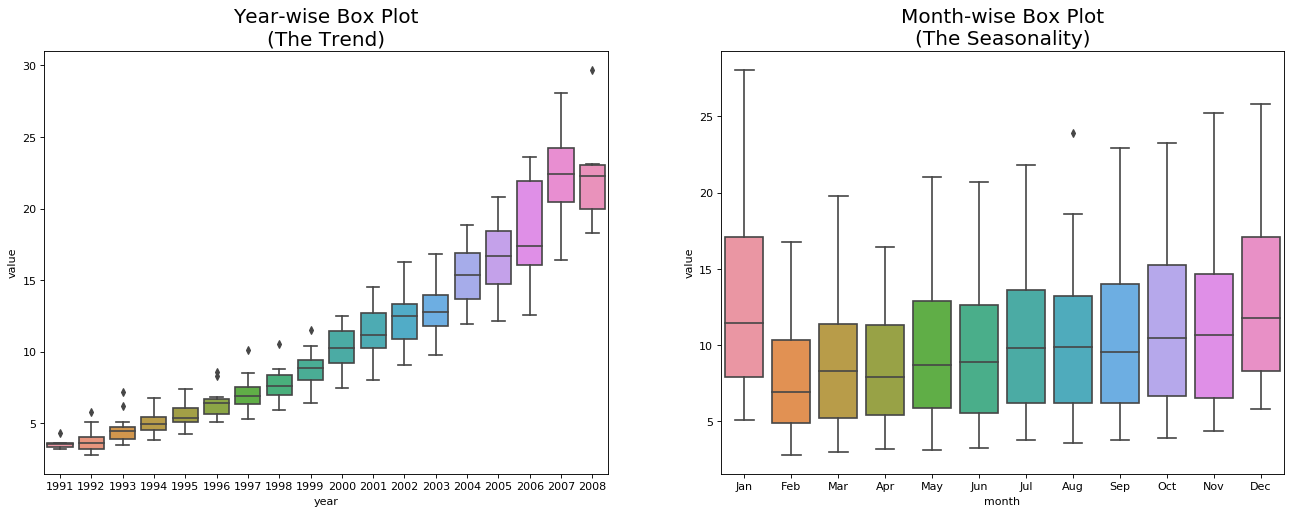

In [33]:
# Import Data
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

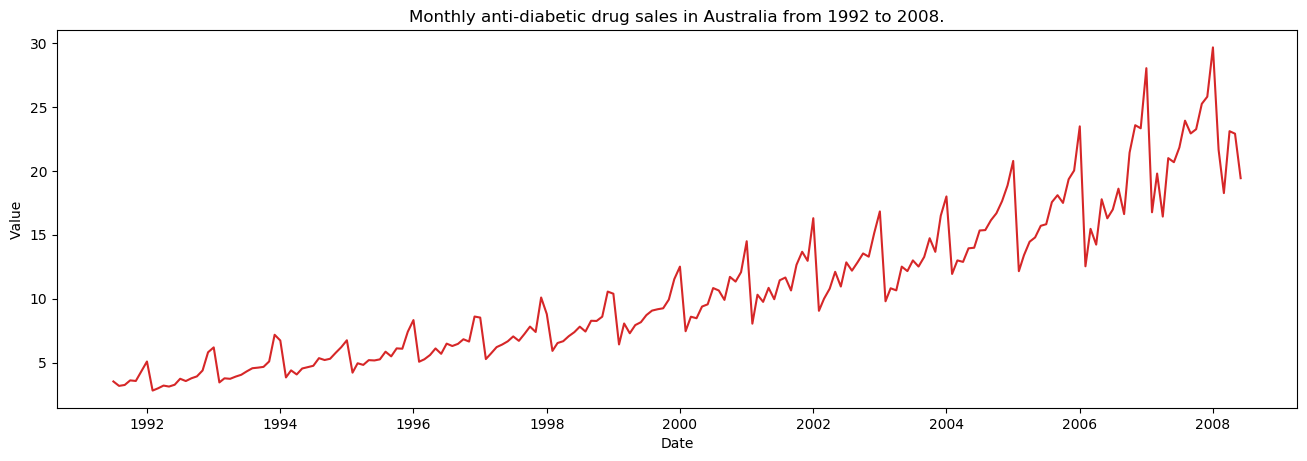

In [18]:
# Time series data source: fpp pacakge in R.
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.') 
plt.show()

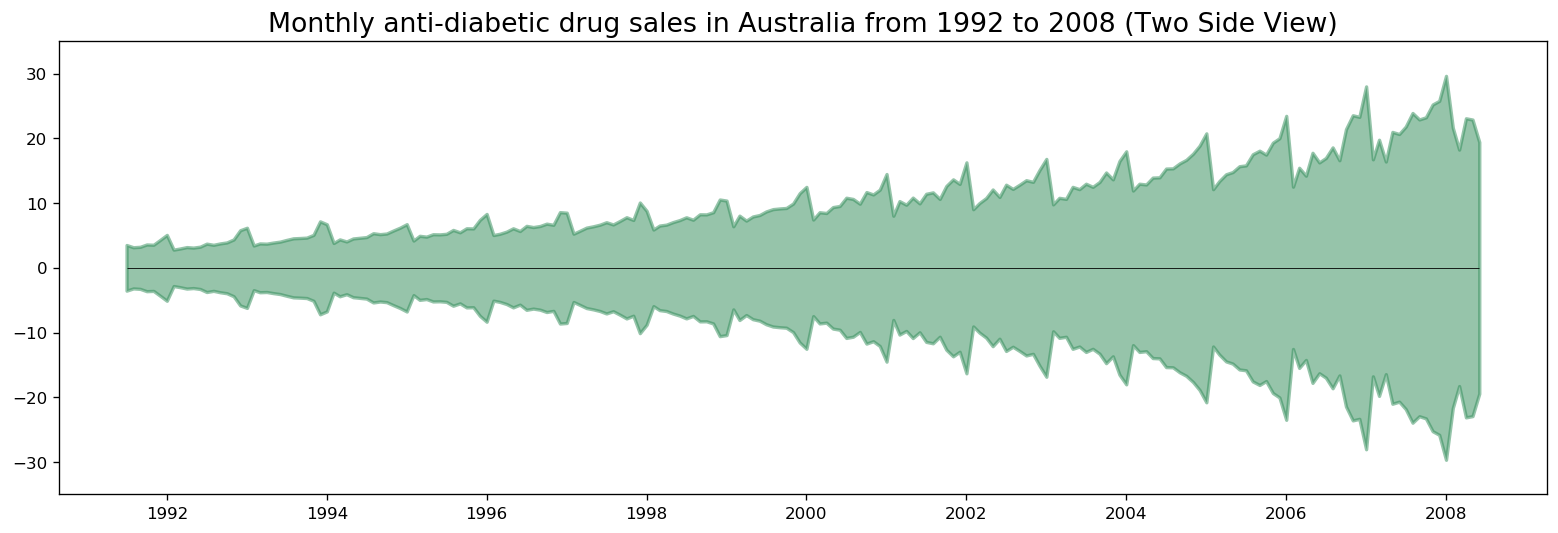

In [21]:
# Import data
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
x = df['date'].values
y1 = df['value'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-35, 35)
plt.title('Monthly anti-diabetic drug sales in Australia from 1992 to 2008 (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.date), xmax=np.max(df.date), linewidth=.5)
plt.show()

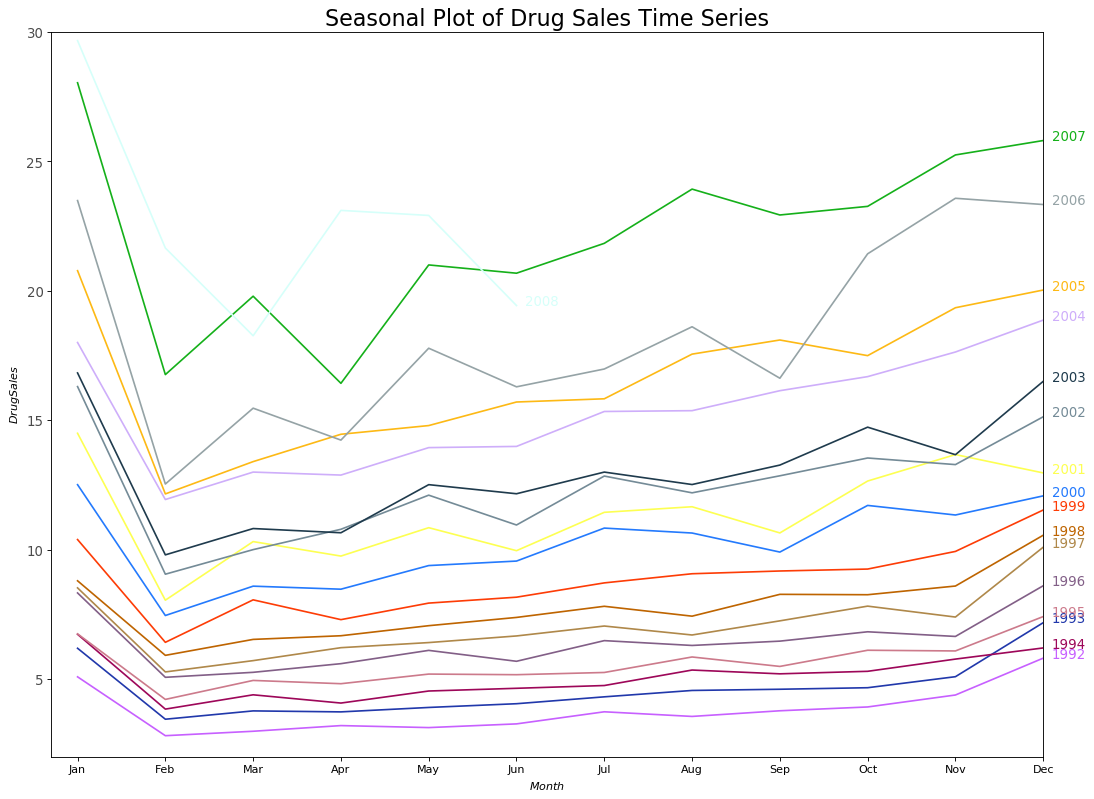

In [23]:
# Import Data
import matplotlib as mpl
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

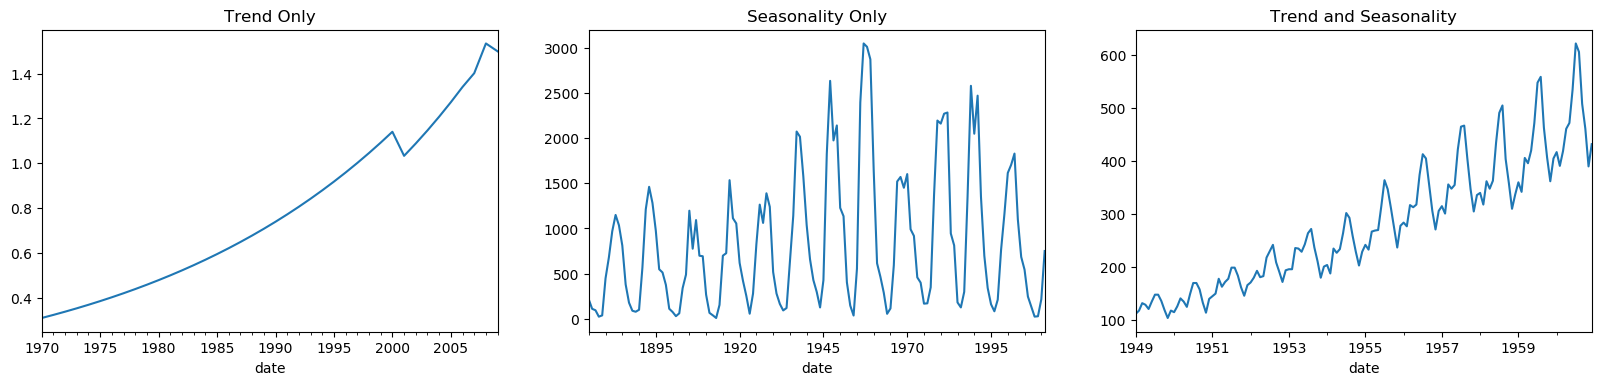

In [24]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2])
plt.show()

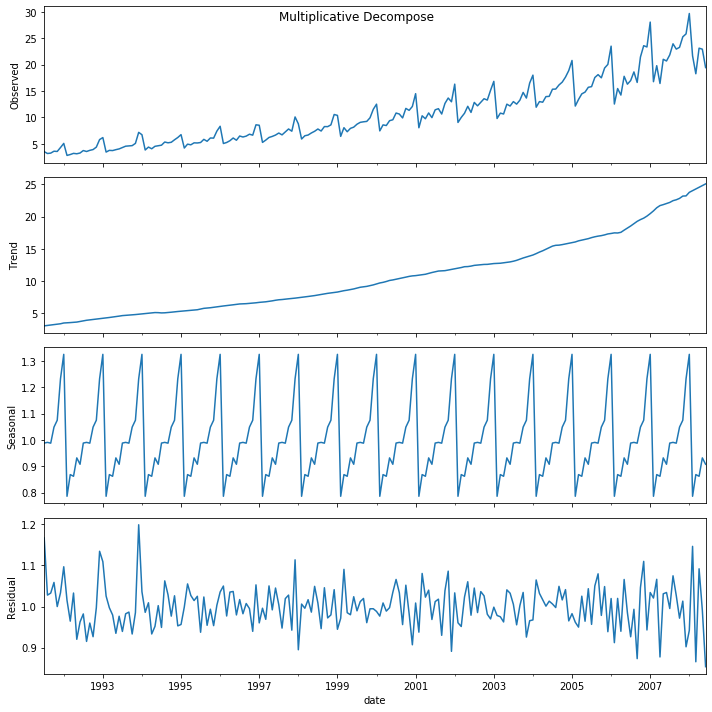

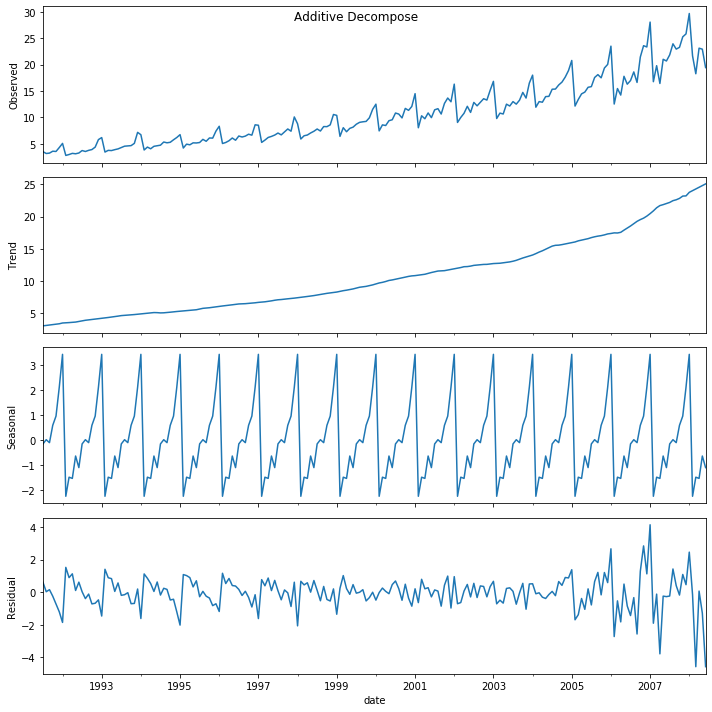

In [41]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
data = read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

#additive decomposition
result_add = seasonal_decompose(data, model='additive',extrapolate_trend='freq')

#multiplicative decomposition
result_mul = seasonal_decompose(data, model='multiplicative',extrapolate_trend='freq')

#plot
result_mul.plot().suptitle('Multiplicative Decompose')
result_add.plot().suptitle('Additive Decompose')
pyplot.show()